In [1]:
import pandas as pd
import quandl as qd
import numpy as np
import html5lib 
import bs4
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import mpld3  #This is to make graph interactive
mpld3.enable_notebook()
# %matplotlib inline

In [9]:
api_key = open("api_key_quandl.txt", "r").read()

In [6]:
def state_list():
    fiddy_states = pd.read_html("https://simple.wikipedia.org/wiki/List_of_U.S._states")
    np_fiddy_states = np.array(fiddy_states[0]) 
    return np_fiddy_states[1:,1]    

In [ ]:
def grab_initial_state_data():
    main_df = pd.DataFrame()
    for abv in state_list():
        query = "FMAC/HPI_" + abv
        df = qd.get(query, authtoken = api_key)
        df.rename(columns = {"Value":abv}, inplace = True) #If you remove this line an error will occur you can check that out
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            # This is pyhton way of pickling
#     pickle_out = open("fiddy_states.pickle", "wb")
#     pickle.dump(main_df, pickle_out)
#     pickle_out.close()
            # This is pandas way of pickling  
#       main_df.to_pickle('pickle.pickle')  
grab_initial_state_data()

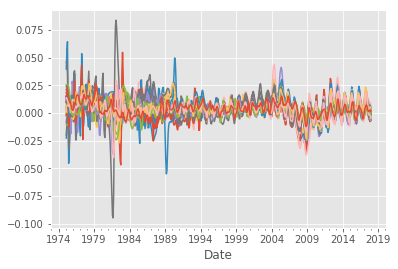

In [5]:
HPI_data = pd.read_pickle('pickle.pickle')
HPI_data.pct_change().plot()
plt.legend().remove()

#### In the above graph the percent change is measured from any aribitary value so we will tweak the code so that it is measured from the starting value

In [65]:
HPI_data = pd.read_pickle('pickle.pickle')
def percent_change_from_start():
    HPI_pct_change_data = pd.DataFrame()
    for abv in HPI_data:
        # substracting some number from a DataFrame leads to substracting that number from each element of the DataFrame
        HPI_pct_change_data[abv] = ((HPI_data[abv] - HPI_data[abv][0]) * 100)/ HPI_data[abv][0]
    return HPI_pct_change_data
HPI_pct_change_data = percent_change_from_start()
HPI_pct_change_data.to_pickle('fiddy_states3.pickle')

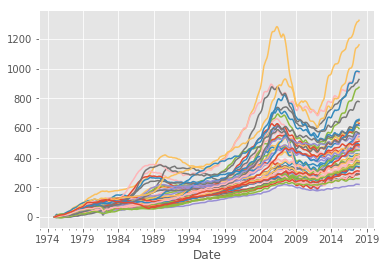

In [7]:
HPI_pct_change_data = pd.read_pickle('fiddy_states3.pickle')
HPI_pct_change_data.plot()
plt.legend().remove()

### Now we will benchmark it against USA HPI

In [16]:
def HPI_benchmark():
    benchmark = qd.get("FMAC/HPI_USA", authtoken = api_key)
    benchmark['Value'] = ((benchmark['Value'] - benchmark['Value'][0]) * 100) / benchmark['Value'][0]
    return benchmark

In [17]:
benchmark = HPI_benchmark()
benchmark.head(10)

,Value
Date,
1975-01-31,0.000000
1975-02-28,0.643926
1975-03-31,1.693014
1975-04-30,3.059974
1975-05-31,3.912826
1975-06-30,4.117936
1975-07-31,4.380143
1975-08-31,4.793973
1975-09-30,5.155793


AttributeError: module 'pandas' has no attribute 'read'

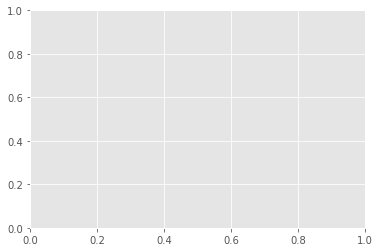

In [19]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
HPI_pct_change_data = pd.read('fiddy_states3.pickle')
HPI_pct_change_data.plot(ax = ax1)

benchmark = HPI_benchmark()
benchmark.plot(ax = ax1, color = 'k', linewidth = 10)

plt.legend().remove()